Importing dependencies

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and processing

In [3]:
#loading the data into dataframe
insurance_data = pd.read_csv('/content/insurance.csv')

In [4]:
#printing the first 5 rows of dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#number of rows and colums
insurance_data.shape

(1338, 7)

In [5]:
#getting the information about the data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Catogarical values

sex
smoker
region

In [8]:
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data analysis

In [9]:
#getting some statistical measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-13-371d7b476912>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


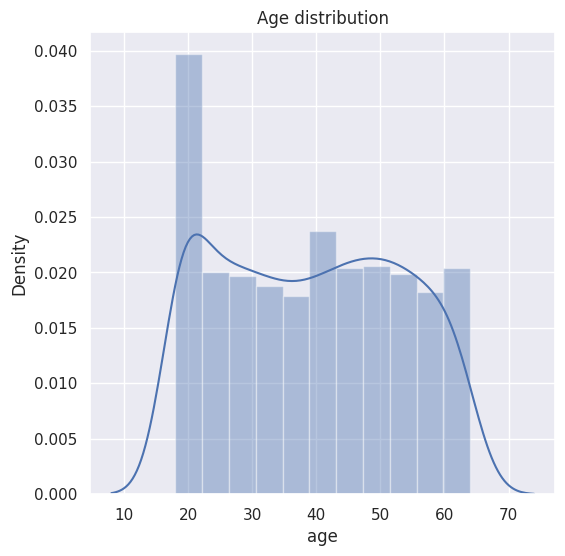

In [13]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age distribution')
plt.show()

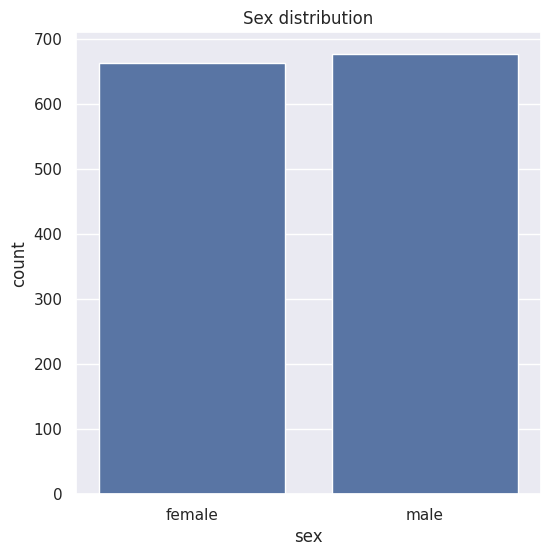

In [14]:
#distibution for gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex distribution')
plt.show()

In [16]:
insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-17-8aea1255d53d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


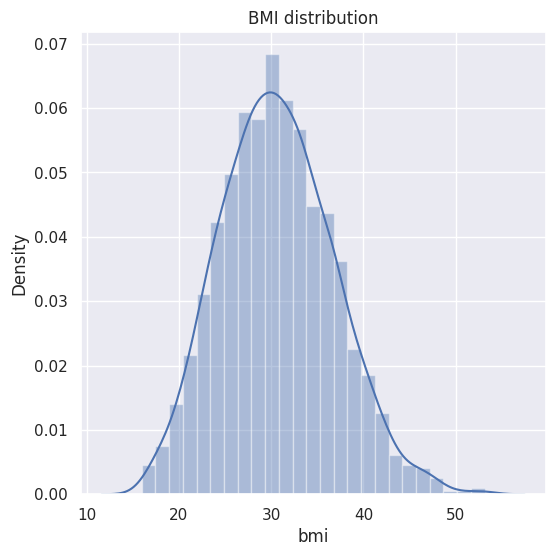

In [17]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI distribution')
plt.show()

Normal BMI --> 18.5 to 24.9

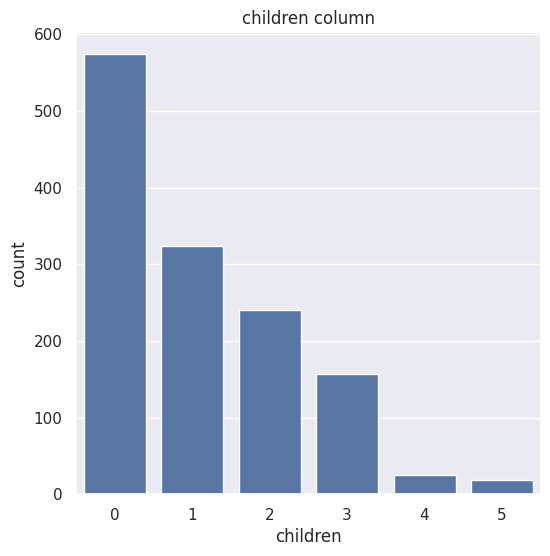

In [18]:
#distribution for childern column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('children column')
plt.show()

In [19]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


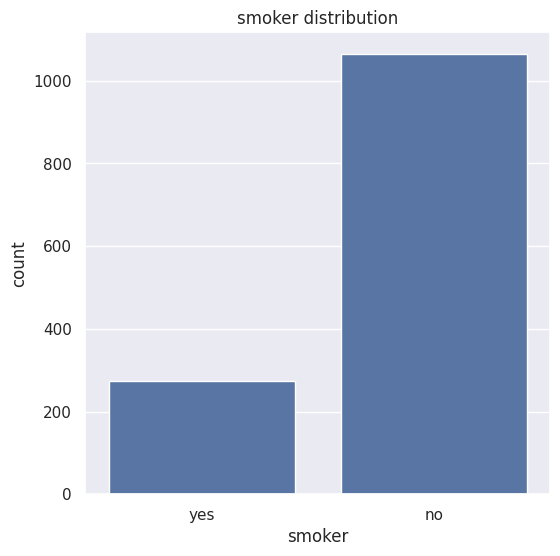

In [20]:
#distribution for smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('smoker distribution')
plt.show()

In [21]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


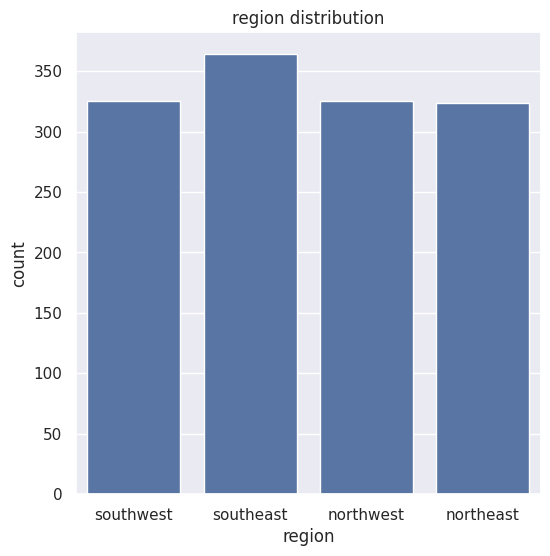

In [22]:
#distribution for region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('region distribution')
plt.show()

In [23]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-24-cb697a54071b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


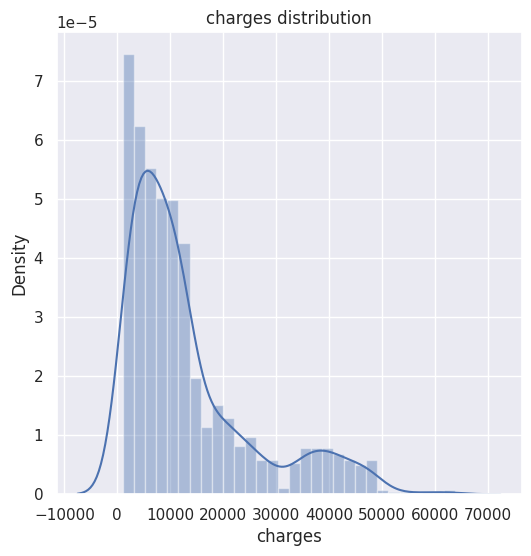

In [24]:
#distribution plot for charges
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('charges distribution')
plt.show()

Data preprocessing

In [28]:
#encoding the categorical data to numerical data
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [29]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


splitting the features and target

In [30]:
x=insurance_data.drop(columns='charges',axis=1)
y=insurance_data['charges']

In [32]:
print(x,y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [33]:
#splitting training and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training --> Linear regression

In [35]:
model=LinearRegression()

In [36]:
#training the model using training data
model.fit(x_train,y_train)

LinearRegression()

model evalution

In [38]:
#prediction on training data
x_train_pred = model.predict(x_train)
x_train_r2 = metrics.r2_score(y_train, x_train_pred)
print("R squared value for training data : ",x_train_r2)

R squared value for training data :  0.7519923667088932


In [39]:
#prediction on test data
x_test_pred = model.predict(x_test)
x_test_r2 = metrics.r2_score(y_test,x_test_pred)
print("R squared vallue for test data : ",x_test_r2)

R squared vallue for test data :  0.7445422986536503


predition model

In [41]:
input_data = (60,1,25.84,0,1,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
print("Medical Insurance cost : ",prediction)

[11557.79188543]
Medical Insurance cost :  [11557.79188543]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
